In [3]:
import pandas as pd
weather = pd.read_csv("/home/ruth/mlprojects/climate.csv", index_col="DATE")
weather


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
2000-01-01,KE000063661,"KITALE, KE",1.016,35.0,1875.0,0.00,67,83.0,50.0
2000-01-02,KE000063661,"KITALE, KE",1.016,35.0,1875.0,NaN,59,82.0,52.0
2000-01-03,KE000063661,"KITALE, KE",1.016,35.0,1875.0,NaN,72,82.0,51.0
2000-01-04,KE000063661,"KITALE, KE",1.016,35.0,1875.0,NaN,68,NaN,50.0
2000-01-05,KE000063661,"KITALE, KE",1.016,35.0,1875.0,0.00,64,84.0,47.0
...,...,...,...,...,...,...,...,...,...
2023-11-12,KE000063661,"KITALE, KE",1.016,35.0,1875.0,NaN,67,79.0,56.0
2023-11-13,KE000063661,"KITALE, KE",1.016,35.0,1875.0,NaN,66,78.0,59.0
2023-11-14,KE000063661,"KITALE, KE",1.016,35.0,1875.0,0.28,67,NaN,NaN


# PREPARING DATA 

In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION      0.000000
NAME         0.000000
LATITUDE     0.000000
LONGITUDE    0.000000
ELEVATION    0.000000
PRCP         0.417813
TAVG         0.000000
TMAX         0.449032
TMIN         0.134557
dtype: float64

In [5]:
core_weather = weather[["PRCP","TAVG","TMAX","TMIN"]].copy()
core_weather.columns = ["precip","temp_avg","temp_max", "temp_min"]
core_weather

,precip,temp_avg,temp_max,temp_min
DATE,,,,
2000-01-01,0.00,67,83.0,50.0
2000-01-02,NaN,59,82.0,52.0
2000-01-03,NaN,72,82.0,51.0
2000-01-04,NaN,68,NaN,50.0
2000-01-05,0.00,64,84.0,47.0
...,...,...,...,...
2023-11-12,NaN,67,79.0,56.0
2023-11-13,NaN,66,78.0,59.0
2023-11-14,0.28,67,NaN,NaN


<!-- FILLING MISSING VALUES -->

FILING IN MISSING VALUES

In [7]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.417813
temp_avg    0.000000
temp_max    0.449032
temp_min    0.134557
dtype: float64

In [8]:
core_weather["precip"].value_counts()

precip
0.00    1682
0.08     307
0.02     264
0.04     239
0.12     220
        ... 
1.89       1
9.10       1
3.82       1
1.69       1
5.59       1
Name: count, Length: 76, dtype: int64

In [9]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_avg,temp_max,temp_min
DATE,,,,
2000-01-02,NaN,59,82.0,52.0
2000-01-03,NaN,72,82.0,51.0
2000-01-04,NaN,68,NaN,50.0
2000-01-06,NaN,64,NaN,47.0
2000-01-08,NaN,68,83.0,50.0
...,...,...,...,...
2023-11-01,NaN,68,77.0,55.0
2023-11-10,NaN,68,NaN,59.0
2023-11-11,NaN,68,NaN,57.0


In [12]:
core_weather.loc["2000-01-1": "2000-12-31", :]

,precip,temp_avg,temp_max,temp_min
DATE,,,,
2000-01-10,NaN,64,77.0,56.0
2000-01-11,NaN,66,82.0,54.0
2000-01-12,0.0,68,84.0,52.0
2000-01-13,NaN,72,NaN,51.0
2000-01-14,NaN,67,84.0,49.0
...,...,...,...,...
2000-12-27,NaN,68,83.0,52.0
2000-12-28,NaN,66,80.0,56.0
2000-12-29,NaN,65,80.0,56.0


In [15]:
#FILLING MISSING VALUES BY 0
core_weather["precip"]= core_weather["precip"].fillna(0)

In [19]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_avg,temp_max,temp_min
DATE,,,,
2000-01-09,0.00,69,81.0,NaN
2000-01-17,0.00,67,86.0,NaN
2000-01-23,0.00,68,82.0,NaN
2000-02-10,0.00,67,81.0,NaN
2000-02-21,0.00,66,86.0,NaN
...,...,...,...,...
2023-10-30,0.16,66,NaN,NaN
2023-10-31,0.00,68,79.0,NaN
2023-11-08,0.20,66,NaN,NaN


In [21]:
core_weather=core_weather.fillna(method="ffill")
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

/tmp/ipykernel_24333/4183530642.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather=core_weather.fillna(method="ffill")


precip      0.0
temp_avg    0.0
temp_max    0.0
temp_min    0.0
dtype: float64

                                                          VERIFYING IF WE HAVE CORRECT DATA TYPES

In [22]:
core_weather.dtypes

precip      float64
temp_avg      int64
temp_max    float64
temp_min    float64
dtype: object

In [23]:
core_weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-08', '2000-01-09', '2000-01-10', '2000-01-11',
       ...
       '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11',
       '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16'],
      dtype='object', name='DATE', length=7848)

In [25]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-08', '2000-01-09',
               '2000-01-10', '2000-01-11',
               ...
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-11', '2023-11-12', '2023-11-13', '2023-11-14',
               '2023-11-15', '2023-11-16'],
              dtype='datetime64[ns]', name='DATE', length=7848, freq=None)

In [26]:
#ensuring our columns dont have.9999 values
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_avg    0
temp_max    0
temp_min    0
dtype: int64

                                                    ANALYZING WEATHER DATA

In [28]:
core_weather = [["temp_max", "temp_min"]].plot()

AttributeError: 'list' object has no attribute 'plot'

<Axes: >

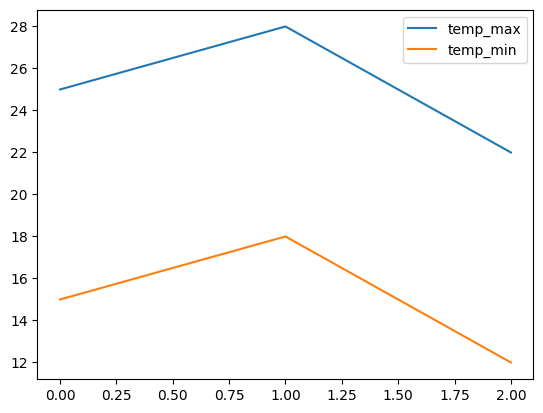

In [33]:
core_weather_data = {"temp_max": [25, 28, 22], "temp_min": [15, 18, 12]}
core_weather_df = pd.DataFrame(core_weather_data)

# Now you can use the plot() method
core_weather_df.plot()

In [34]:
core_weather.index.year.value_counts().sort_index()

DATE
2000    344
2001    353
2002    362
2003    359
2004    347
2005    311
2006    259
2007    274
2008    206
2009    232
2010    275
2011    364
2012    366
2013    358
2014    363
2015    349
2016    298
2017    343
2018    338
2019    360
2020    361
2021    344
2022    362
2023    320
Name: count, dtype: int64

In [35]:
core_weather["precip"].plot

In [36]:
core_weather["precip"].plot

                                   TRAINING OUR FIRST MACHINE LEARNING MODEL

In [37]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]
core_weather

,precip,temp_avg,temp_max,temp_min,target
DATE,,,,,
2000-01-01,0.00,67,83.0,50.0,82.0
2000-01-02,0.00,59,82.0,52.0,82.0
2000-01-03,0.00,72,82.0,51.0,82.0
2000-01-04,0.00,68,82.0,50.0,84.0
2000-01-05,0.00,64,84.0,47.0,84.0
...,...,...,...,...,...
2023-11-12,0.00,67,79.0,56.0,78.0
2023-11-13,0.00,66,78.0,59.0,78.0
2023-11-14,0.28,67,78.0,59.0,78.0


In [38]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precip,temp_avg,temp_max,temp_min,target
DATE,,,,,
2000-01-01,0.00,67,83.0,50.0,82.0
2000-01-02,0.00,59,82.0,52.0,82.0
2000-01-03,0.00,72,82.0,51.0,82.0
2000-01-04,0.00,68,82.0,50.0,84.0
2000-01-05,0.00,64,84.0,47.0,84.0
...,...,...,...,...,...
2023-11-11,0.00,68,77.0,57.0,79.0
2023-11-12,0.00,67,79.0,56.0,78.0
2023-11-13,0.00,66,78.0,59.0,78.0


In [39]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [40]:
predictors = ["precip", "temp_max", "temp_min"] ##variables we are using to make the predictions

train = core_weather.loc[:"2020-12-31"]

test = core_weather.loc["2021-01-01" :]

In [41]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [43]:
predictions = reg.predict(test[predictors])

from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["target"], predictions)

0.7922023954449182

                                           EVALUATING THE MODEL

In [44]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis = 1)

combined.columns = ["actual", "predictions"]

In [45]:
combined 

,actual,predictions
DATE,,
2021-01-01,80.0,80.066052
2021-01-02,80.0,79.894968
2021-01-03,80.0,80.058002
2021-01-04,80.0,80.085213
2021-01-05,80.0,80.112424
...,...,...
2023-11-11,79.0,77.434963
2023-11-12,78.0,79.102023
2023-11-13,78.0,78.200466


<Axes: xlabel='DATE'>

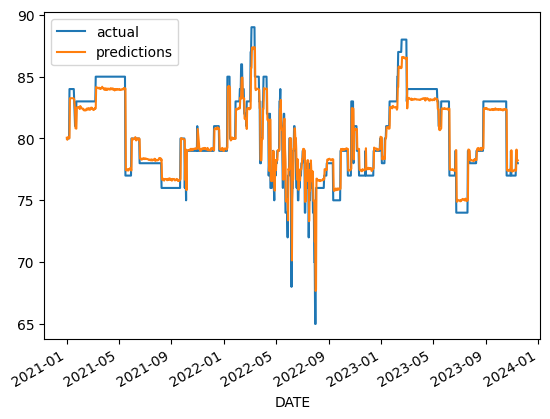

In [46]:
combined.plot()

In [47]:
reg.coef_

array([ 0.0230009 ,  0.81992488, -0.02721075])

                                                  CREATING A FUNCTION TO MAKE PREDICTIONS

In [50]:
def create_predictions (predictors, core_weather, reg):
        
    train = core_weather.loc[:"2020-12-31"]
    
    test = core_weather.loc["2021-01-01" :]
    
    reg.fit(train[predictors], train["target"])
    
    predictions = reg.predict(test[predictors])
  
    error = mean_absolute_error(test["target"], predictions)

    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis = 1)
    
    combined.columns = ["actual", "predictions"]

    return error, combined
    
    

In [51]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [52]:
core_weather

,precip,temp_avg,temp_max,temp_min,target,month_max
DATE,,,,,,
2000-01-01,0.00,67,83.0,50.0,82.0,NaN
2000-01-02,0.00,59,82.0,52.0,82.0,NaN
2000-01-03,0.00,72,82.0,51.0,82.0,NaN
2000-01-04,0.00,68,82.0,50.0,84.0,NaN
2000-01-05,0.00,64,84.0,47.0,84.0,NaN
...,...,...,...,...,...,...
2023-11-11,0.00,68,77.0,57.0,79.0,78.666667
2023-11-12,0.00,67,79.0,56.0,78.0,78.533333
2023-11-13,0.00,66,78.0,59.0,78.0,78.366667


In [7]:
import pandas as pd
weather1 = pd.read_csv("/home/ruth/Downloads/NYERI.csv", skiprows=11)  # Skip the first 14 rows
weather1

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,T2M_MAX,2000,27.71,29.62,29.58,27.58,26.22,25.43,25.48,24.22,26.17,26.28,25.05,26.34,29.62
1,T2M_MAX,2001,26.13,27.96,28.48,24.90,24.03,22.88,25.06,25.57,26.18,26.68,22.48,24.33,28.48
2,T2M_MAX,2002,26.37,29.23,27.23,25.60,24.19,23.92,24.32,24.74,26.98,26.53,24.40,24.21,29.23
3,T2M_MAX,2003,27.87,29.48,30.00,27.98,22.60,21.92,22.25,23.62,24.37,25.75,24.50,25.98,30.00
4,T2M_MAX,2004,27.01,28.26,29.93,25.35,24.00,23.33,25.39,26.05,26.85,27.55,24.70,26.71,29.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,PRECTOTCORR,2018,0.00,0.00,10.55,21.09,5.27,0.00,0.00,0.00,0.00,5.27,5.27,5.27,5.27
65,PRECTOTCORR,2019,0.00,0.00,0.00,0.00,5.27,5.27,0.00,0.00,0.00,10.55,10.55,5.27,5.27
66,PRECTOTCORR,2020,5.27,0.00,5.27,15.82,5.27,5.27,0.00,0.00,5.27,5.27,5.27,0.00,5.27
67,PRECTOTCORR,2021,1.02,2.64,4.42,5.10,5.69,0.66,2.68,1.58,1.27,2.85,4.23,5.82,3.17


In [9]:
transposed_df = weather1.transpose()
transposed_df


,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
PARAMETER,T2M_MAX,T2M_MAX,T2M_MAX,T2M_MAX,T2M_MAX,T2M_MAX,T2M_MAX,T2M_MAX,T2M_MAX,T2M_MAX,...,PRECTOTCORR,PRECTOTCORR,PRECTOTCORR,PRECTOTCORR,PRECTOTCORR,PRECTOTCORR,PRECTOTCORR,PRECTOTCORR,PRECTOTCORR,PRECTOTCORR
YEAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
JAN,27.71,26.13,26.37,27.87,27.01,27.8,29.79,26.92,27.51,27.94,...,0.0,0.0,0.0,5.27,0.0,0.0,0.0,5.27,1.02,1.61
FEB,29.62,27.96,29.23,29.48,28.26,32.1,29.95,28.57,28.61,28.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.64,1.69
MAR,29.58,28.48,27.23,30.0,29.93,29.33,26.89,29.13,29.02,29.99,...,5.27,0.0,5.27,0.0,0.0,10.55,0.0,5.27,4.42,4.83
APR,27.58,24.9,25.6,27.98,25.35,30.23,26.01,27.05,24.78,26.72,...,10.55,5.27,10.55,10.55,5.27,21.09,0.0,15.82,5.1,9.3
MAY,26.22,24.03,24.19,22.6,24.0,25.34,23.31,23.44,24.12,25.12,...,0.0,0.0,5.27,5.27,5.27,5.27,5.27,5.27,5.69,2.31
JUN,25.43,22.88,23.92,21.92,23.33,24.87,24.49,24.2,24.73,26.98,...,0.0,0.0,0.0,0.0,0.0,0.0,5.27,5.27,0.66,1.34
JUL,25.48,25.06,24.32,22.25,25.39,24.42,24.8,24.07,24.15,26.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.68,3.24
AUG,24.22,25.57,24.74,23.62,26.05,24.38,24.92,23.76,26.07,25.72,...,0.0,5.27,0.0,0.0,0.0,0.0,0.0,0.0,1.58,4.41
